# Project: How much does it cost to stay in Seattle?

# Section 1: Business Understanding  

### Question 1: What are the prices listings?  
### Question 2: When is the cheapest time of year?  
### Question 3: Which accommodation conditions are relevant to the price?  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

# Section 2: Data Understanding

### Gather

In [2]:
calendar_df = pd.read_csv('Seattle Airbnb Data from Kaggle/calendar.csv')
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
reviews_df = pd.read_csv('Seattle Airbnb Data from Kaggle/reviews.csv')
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
listings_df = pd.read_csv('Seattle Airbnb Data from Kaggle/listings.csv')
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
calendar_df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [6]:
listings_df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [7]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

Since reviews.csv is not required for this Business Understanding, it is not used.

In [8]:
listings_df.select_dtypes(include=float)

,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,square_feet,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,3.0,3.0,47.636289,-122.371025,1.0,1.0,1.0,NaN,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,4.07
1,6.0,6.0,47.639123,-122.365666,1.0,1.0,1.0,NaN,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.48
2,2.0,2.0,47.629724,-122.369483,4.5,5.0,7.0,NaN,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.15
3,1.0,1.0,47.638473,-122.369279,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,47.632918,-122.372471,2.0,3.0,3.0,NaN,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,354.0,354.0,47.664295,-122.359170,2.0,3.0,3.0,NaN,80.0,8.0,10.0,4.0,8.0,10.0,8.0,NaN,0.30
3814,1.0,1.0,47.649552,-122.318309,1.0,1.0,2.0,NaN,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2.00
3815,1.0,1.0,47.508453,-122.240607,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3816,1.0,1.0,47.632335,-122.275530,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
listings_df.select_dtypes(include=int)

,id,scrape_id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count
0,241032,20160104002432,956883,4,2,1,365,14,41,71,346,207,2
1,953595,20160104002432,5177328,4,1,2,90,13,13,16,291,43,6
2,3308979,20160104002432,16708587,11,10,4,30,1,6,17,220,20,2
3,7421966,20160104002432,9851441,3,1,1,1125,0,0,0,143,0,1
4,278830,20160104002432,1452570,6,6,1,1125,30,60,90,365,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,20160104002432,31148752,6,1,3,1125,18,32,32,32,1,8
3814,8902327,20160104002432,46566046,4,3,2,29,6,26,44,273,2,1
3815,10267360,20160104002432,52791370,2,2,1,7,29,59,88,88,0,1
3816,9604740,20160104002432,25522052,2,1,3,1125,30,60,90,179,0,1


# Section 3: Data Preparation

### Clean

Text(0.5, 1.0, 'Missing values per columns, %')

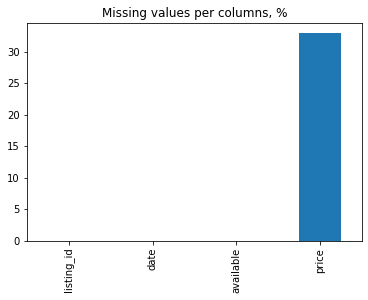

In [10]:
calendar_missing_df = calendar_df.isnull().mean()*100
calendar_missing_df.plot(kind="bar")
plt.title("Missing values per columns, %")

・Since only about 30% is missing, we will remove the missing value of PRICE this time.  
(We have determined that about 70% of the data is sufficient.)  
・Available is not relevant to the price, so it will be removed.

In [11]:
calendar_missing_df = calendar_df.dropna(subset=['price'])
calendar_missing_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00
...,...,...,...,...
1393207,10208623,2016-01-06,t,$87.00
1393208,10208623,2016-01-07,t,$87.00
1393211,10208623,2016-01-10,t,$87.00
1393212,10208623,2016-01-11,t,$87.00


In [12]:
calendar_missing_df = calendar_missing_df.drop(columns=['available'])
calendar_missing_df

,listing_id,date,price
0,241032,2016-01-04,$85.00
1,241032,2016-01-05,$85.00
9,241032,2016-01-13,$85.00
10,241032,2016-01-14,$85.00
14,241032,2016-01-18,$85.00
...,...,...,...
1393207,10208623,2016-01-06,$87.00
1393208,10208623,2016-01-07,$87.00
1393211,10208623,2016-01-10,$87.00
1393212,10208623,2016-01-11,$87.00


In [13]:
def clean_price(df):
    '''
    INPUT
    df - Data frame containing price in columns
    
    OUTPUT
    df - Data frame in which the type of "price" is changed from object to float
    1. Change from object to str
    2. Remove $
    3. Change from str to float
    '''
    df['price'] = df['price'].astype(str)
    df['price'] = df['price'].str.replace("[$, ]", "")
    df['price'] = df['price'].astype(float)
    
    return df


def clean_date(df):
    '''
    INPUT
    df - Data frame containing date in columns
    
    OUTPUT
    df - Data frame with date type changed to datetime and year and month columns added
    1. Change from object to datetime
    2. Add year column
    3. Add month column
    4. Change year type from object to int
    5. Change month type from object to int
    '''
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = pd.to_datetime(df['date']).dt.strftime("%y")
    df['month'] = pd.to_datetime(df['date']).dt.strftime("%m")
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    
    return df


def clean_price_2(df):
    '''
    INPUT
    df - Data frame containing price in columns
    
    OUTPUT
    df - Data frame in which the type of "price" is changed from object to float
    1. Change from object to str
    2. Remove $http://localhost:8889/notebooks/Udacity/Seattle%20Airbnb%20Data.ipynb#
    3. Change from str to float
    '''
    for row in range(df.shape[0]):
        if df['cleaning_fee'][row] is np.nan:
            pass
        
        else:
            df['cleaning_fee'][row] = df['cleaning_fee'][row].replace("$", "")
            df['cleaning_fee'][row] = float(df['cleaning_fee'][row])

    df['extra_people'] = df['extra_people'].astype(str)
    df['extra_people'] = df['extra_people'].str.replace("[$, ]", "")
    df['extra_people'] = df['extra_people'].astype(float)

    return df


def fillna_mean(df):
    '''INPUT
    df - Data frame containing the missing values
    
    OUTPUT
    df - Data frame with mean assigned to missing values
    1. Substitute mean value for missing value
    '''
    df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())
    df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
    df['beds'] = df['beds'].fillna(df['beds'].mean())
    df['cleaning_fee'] = df['cleaning_fee'].fillna(df['cleaning_fee'].mean())

In [14]:
clean_price(calendar_missing_df)
clean_price(listings_df)
clean_date(calendar_missing_df)

/var/folders/h8/6j9fnlsn7bq6gh649_gcjkc80000gn/T/ipykernel_58085/1652884628.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace("[$, ]", "")


,listing_id,date,price,year,month
0,241032,2016-01-04,85.0,16,1
1,241032,2016-01-05,85.0,16,1
9,241032,2016-01-13,85.0,16,1
10,241032,2016-01-14,85.0,16,1
14,241032,2016-01-18,85.0,16,1
...,...,...,...,...,...
1393207,10208623,2016-01-06,87.0,16,1
1393208,10208623,2016-01-07,87.0,16,1
1393211,10208623,2016-01-10,87.0,16,1
1393212,10208623,2016-01-11,87.0,16,1


In [15]:
print(calendar_missing_df['date'].min())
print(calendar_missing_df['date'].max())

2016-01-04 00:00:00
2017-01-02 00:00:00


Only a few days of 2017 data are included, so remove 2017 data and use only 2016 data.

In [16]:
calendar_2016_df = calendar_missing_df[calendar_missing_df['year'] == 16]
calendar_2016_df

,listing_id,date,price,year,month
0,241032,2016-01-04,85.0,16,1
1,241032,2016-01-05,85.0,16,1
9,241032,2016-01-13,85.0,16,1
10,241032,2016-01-14,85.0,16,1
14,241032,2016-01-18,85.0,16,1
...,...,...,...,...,...
1393207,10208623,2016-01-06,87.0,16,1
1393208,10208623,2016-01-07,87.0,16,1
1393211,10208623,2016-01-10,87.0,16,1
1393212,10208623,2016-01-11,87.0,16,1


Selected data that may be relevant to lodging prices.

In [17]:
cols = ['price', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'accommodates', 'guests_included', 'extra_people']

In [18]:
new_listings_df = listings_df[cols]
new_listings_df

,price,bathrooms,bedrooms,beds,cleaning_fee,accommodates,guests_included,extra_people
0,85.0,1.0,1.0,1.0,NaN,4,2,$5.00
1,150.0,1.0,1.0,1.0,$40.00,4,1,$0.00
2,975.0,4.5,5.0,7.0,$300.00,11,10,$25.00
3,100.0,1.0,0.0,2.0,NaN,3,1,$0.00
4,450.0,2.0,3.0,3.0,$125.00,6,6,$15.00
...,...,...,...,...,...,...,...,...
3813,359.0,2.0,3.0,3.0,$230.00,6,1,$0.00
3814,79.0,1.0,1.0,2.0,$50.00,4,3,$25.00
3815,93.0,1.0,1.0,1.0,$35.00,2,2,$20.00
3816,99.0,1.0,0.0,1.0,$45.00,2,1,$0.00


Text(0.5, 1.0, 'Missing values per columns, %')

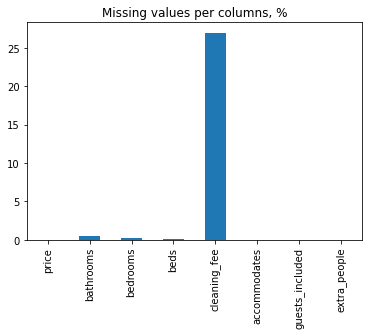

In [19]:
listings_missing_df = new_listings_df.isnull().mean() *100
listings_missing_df.plot(kind="bar")
plt.title("Missing values per columns, %")

In [20]:
new_listings_df.dtypes

price              float64
bathrooms          float64
bedrooms           float64
beds               float64
cleaning_fee        object
accommodates         int64
guests_included      int64
extra_people        object
dtype: object

In [21]:
clean_price_2(new_listings_df)
fillna_mean(new_listings_df)

/var/folders/h8/6j9fnlsn7bq6gh649_gcjkc80000gn/T/ipykernel_58085/1652884628.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaning_fee'][row] = df['cleaning_fee'][row].replace("$", "")
/var/folders/h8/6j9fnlsn7bq6gh649_gcjkc80000gn/T/ipykernel_58085/1652884628.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaning_fee'][row] = float(df['cleaning_fee'][row])
/var/folders/h8/6j9fnlsn7bq6gh649_gcjkc80000gn/T/ipykernel_58085/1652884628.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [22]:
new_listings_df.isnull().sum()

price              0
bathrooms          0
bedrooms           0
beds               0
cleaning_fee       0
accommodates       0
guests_included    0
extra_people       0
dtype: int64

In [23]:
new_listings_df

,price,bathrooms,bedrooms,beds,cleaning_fee,accommodates,guests_included,extra_people
0,85.0,1.0,1.0,1.0,61.710904,4,2,5.0
1,150.0,1.0,1.0,1.0,40.000000,4,1,0.0
2,975.0,4.5,5.0,7.0,300.000000,11,10,25.0
3,100.0,1.0,0.0,2.0,61.710904,3,1,0.0
4,450.0,2.0,3.0,3.0,125.000000,6,6,15.0
...,...,...,...,...,...,...,...,...
3813,359.0,2.0,3.0,3.0,230.000000,6,1,0.0
3814,79.0,1.0,1.0,2.0,50.000000,4,3,25.0
3815,93.0,1.0,1.0,1.0,35.000000,2,2,20.0
3816,99.0,1.0,0.0,1.0,45.000000,2,1,0.0


# Section 4: Data Modeling

### Fit model

In [24]:
X = new_listings_df[['bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'accommodates', 'guests_included', 'extra_people']]
y = new_listings_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

/Users/shonakamura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


'The r-squared score for the model using only quantitative variables was 0.52150866334938 on 1146 values.'

# Section 5: Evaluate the Results

### Question 1: What are the prices listings?  

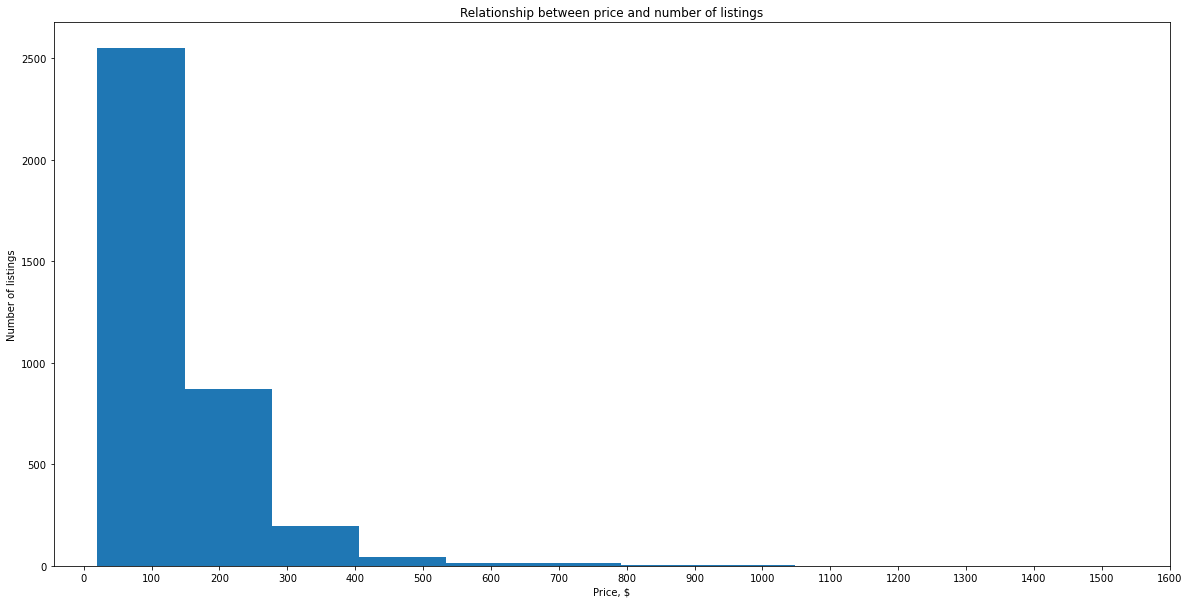

In [25]:
average_price_for_listings = calendar_2016_df.groupby('listing_id').mean()['price']

plt.figure(figsize=(20,10))
plt.hist(average_price_for_listings)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price, $')
plt.title('Relationship between price and number of listings')

plt.savefig('Relationship between price and number of listings.png')

plt.show()

It seems that about 100$ is enough to stay in Seattle.

### Question 2: When is the cheapest time of year?  

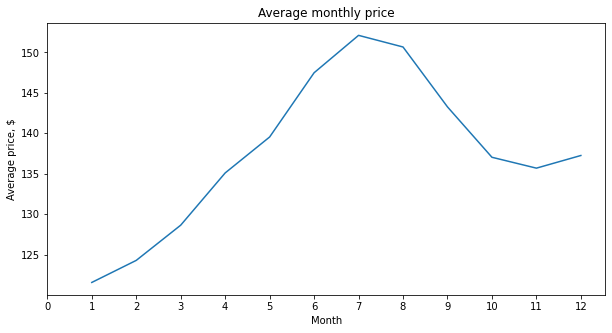

In [26]:
average_price_by_month = calendar_2016_df.groupby('month').mean()['price']

plt.figure(figsize=(10,5))
plt.plot(average_price_by_month)
plt.xticks(np.arange(0, 13, step=1))
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average monthly price')

plt.savefig('Average monthly price.png')

plt.show()

Summer is expected to be the highest due to long vacations such as summer vacation.
If you can go at any time of the year, we suggest going at the beginning of the year.

### Question 3: Which accommodation conditions are relevant to the price?  

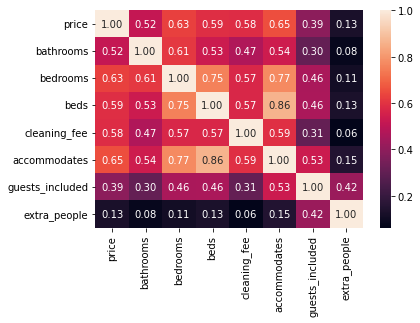

In [27]:
sns.heatmap(new_listings_df.corr(), annot=True, fmt=".2f");

The results of this survey indicate that they are all equally relevant to price.  
It was surprising that extra people did not have that much of an impact.  
Also, cleaning bills are so expensive!